## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
import librosa
print(librosa.__version__)

0.10.1


## Load the Dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('dataset/archive/TESS_Toronto_emotional_speech_set_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        if label=='angry':
            label='anger'
        elif label=='happy':
            label='joy'
        elif label=='sad':
            label='sadness'
        elif label=='ps':
            label='shame'
        labels.append(label.lower())
    
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2800

In [5]:
paths[:5]

['dataset/archive/TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_back_angry.wav',
 'dataset/archive/TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_bar_angry.wav',
 'dataset/archive/TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_base_angry.wav',
 'dataset/archive/TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_bath_angry.wav',
 'dataset/archive/TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_bean_angry.wav']

In [6]:
labels[:5]

['anger', 'anger', 'anger', 'anger', 'anger']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,dataset/archive/TESS_Toronto_emotional_speech_...,anger
1,dataset/archive/TESS_Toronto_emotional_speech_...,anger
2,dataset/archive/TESS_Toronto_emotional_speech_...,anger
3,dataset/archive/TESS_Toronto_emotional_speech_...,anger
4,dataset/archive/TESS_Toronto_emotional_speech_...,anger


In [8]:
df['label'].value_counts()

label
anger      400
disgust    400
fear       400
joy        400
neutral    400
shame      400
sadness    400
Name: count, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

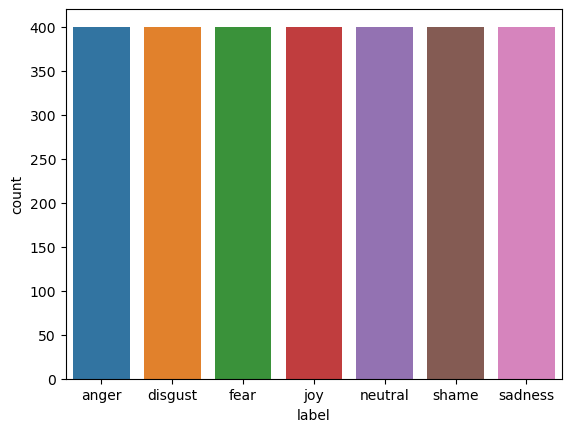

In [9]:
sns.countplot(df['label'])

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

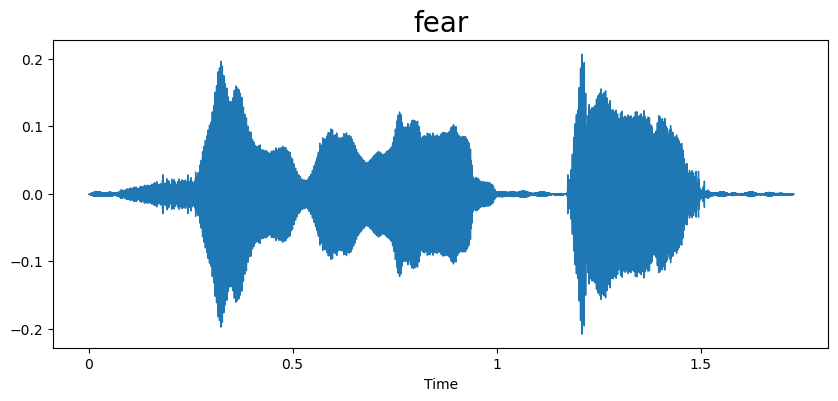

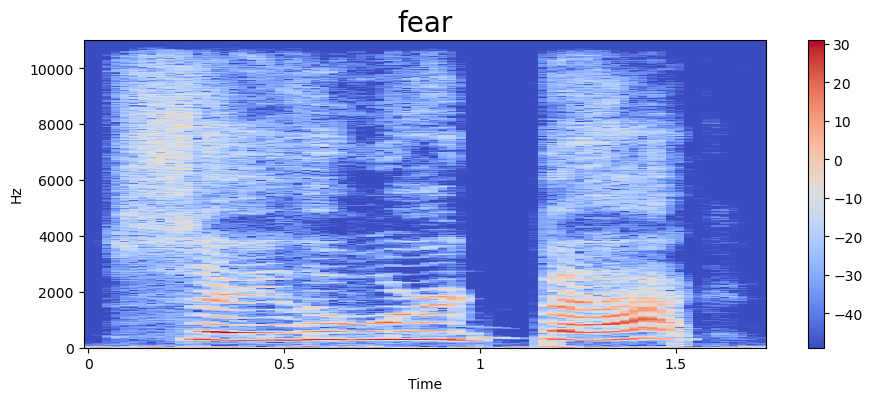

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

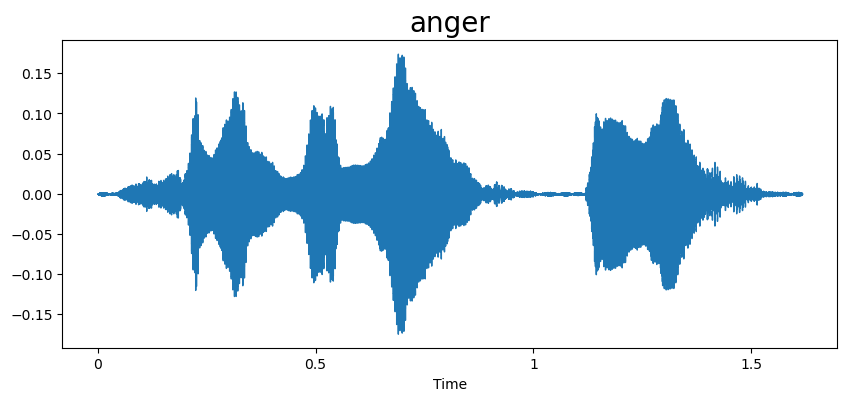

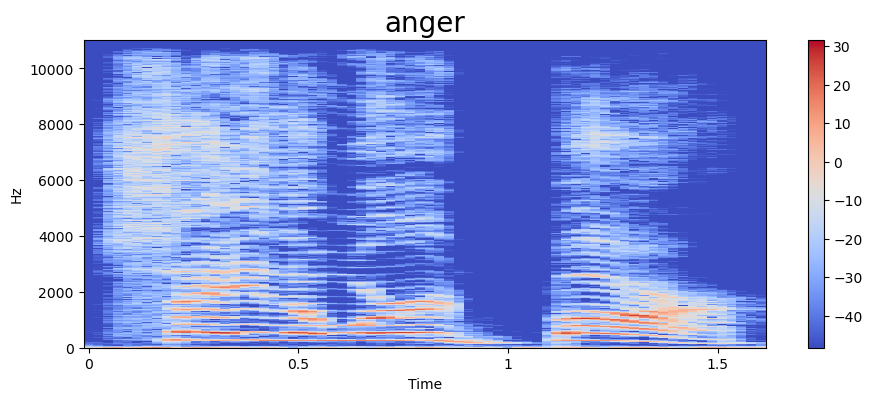

In [18]:
emotion = 'anger'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion) 
spectogram(data, sampling_rate, emotion)
Audio(path)

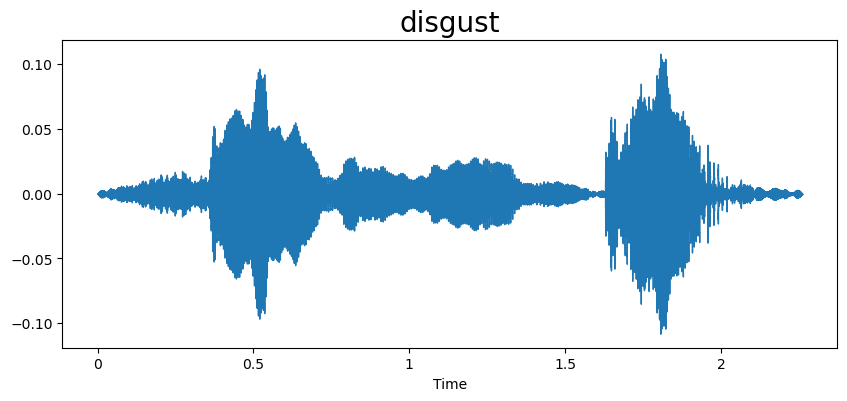

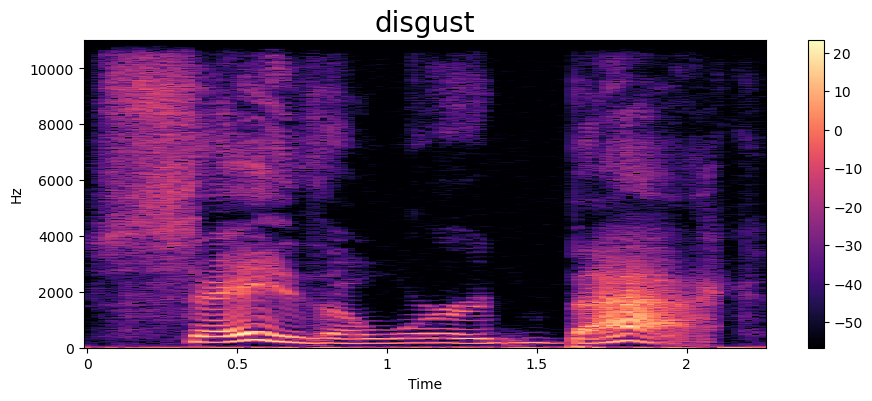

In [19]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

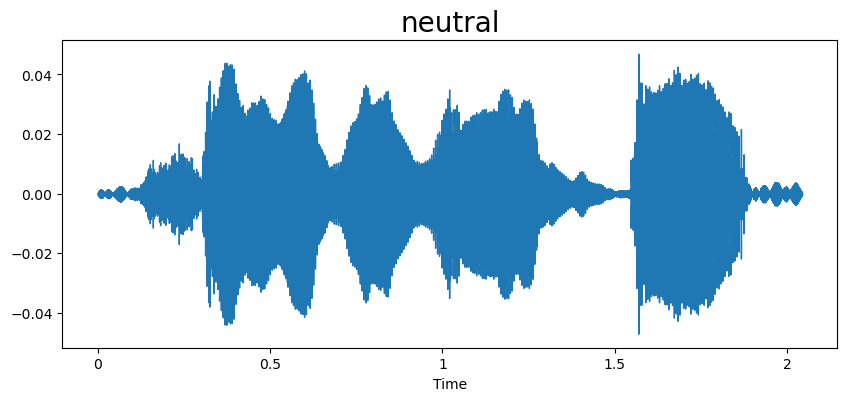

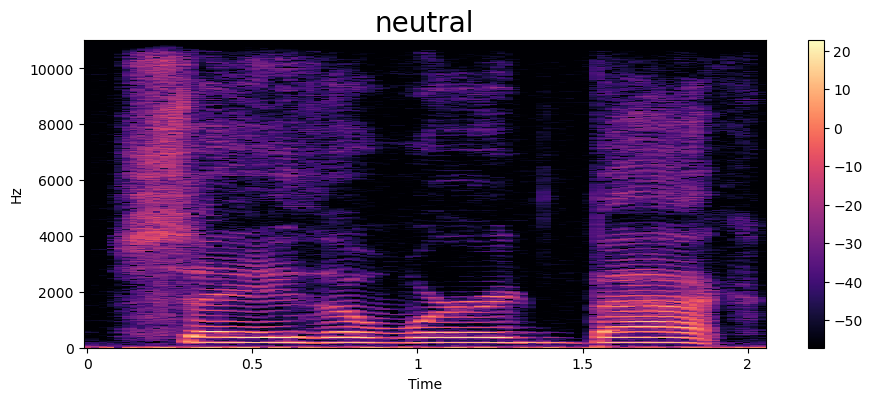

In [22]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

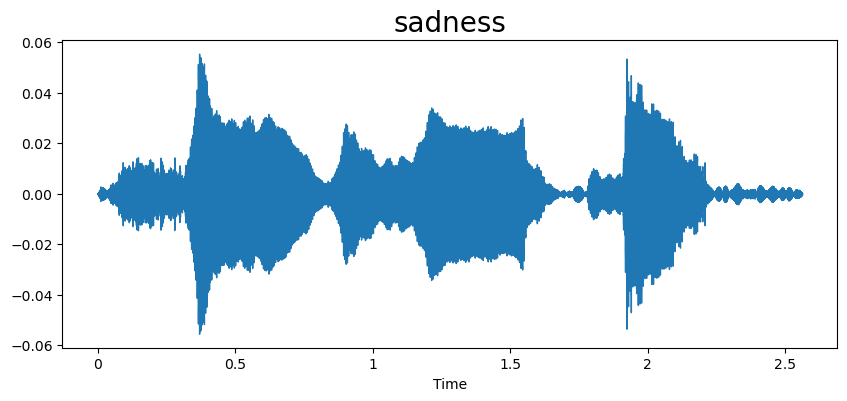

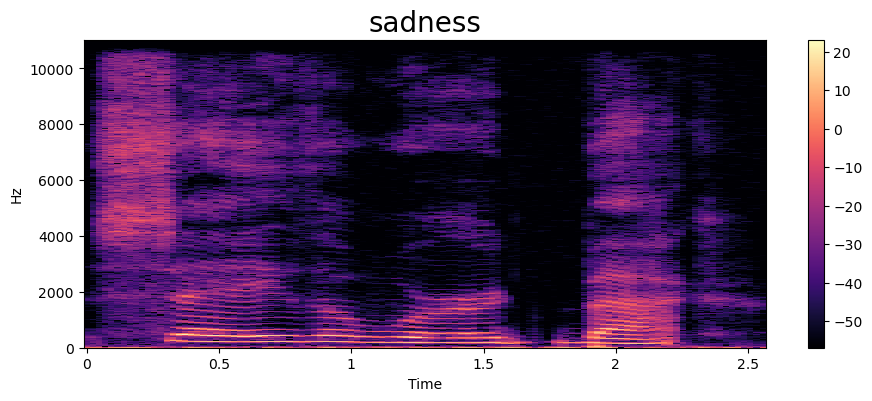

In [23]:
emotion = 'sadness'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

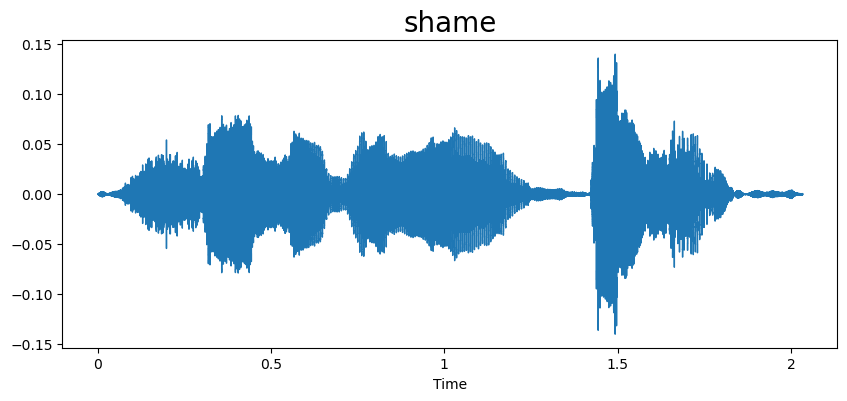

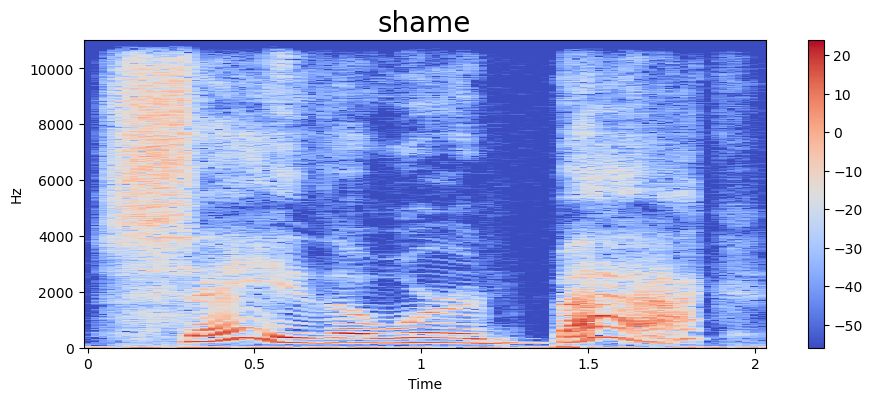

In [12]:
emotion = 'shame'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

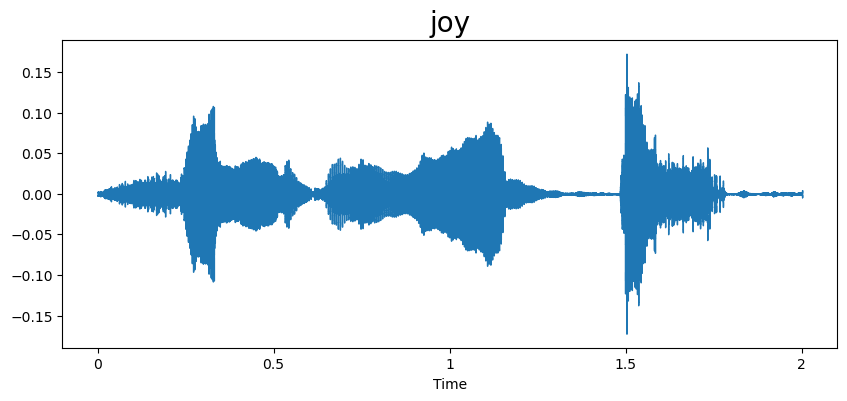

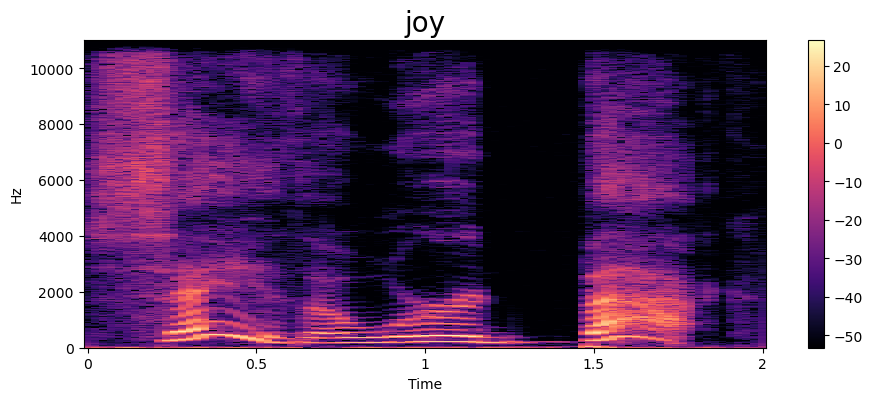

In [13]:
emotion = 'joy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [16]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [17]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [18]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [19]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [21]:
y = y.toarray()

In [22]:
y.shape

(2800, 7)

## Create the LSTM Model

In [23]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [24]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=64)

Epoch 1/20
35/35 [==============================] - 13s 246ms/step - loss: 1.0794 - accuracy: 0.6165 - val_loss: 0.8359 - val_accuracy: 0.6393
Epoch 2/20
35/35 [==============================] - 8s 220ms/step - loss: 0.4459 - accuracy: 0.8442 - val_loss: 0.3743 - val_accuracy: 0.8732
Epoch 3/20
35/35 [==============================] - 8s 233ms/step - loss: 0.1847 - accuracy: 0.9429 - val_loss: 0.1573 - val_accuracy: 0.9429
Epoch 4/20
35/35 [==============================] - 7s 212ms/step - loss: 0.1381 - accuracy: 0.9603 - val_loss: 0.1060 - val_accuracy: 0.9625
Epoch 5/20
35/35 [==============================] - 8s 218ms/step - loss: 0.1248 - accuracy: 0.9638 - val_loss: 0.3855 - val_accuracy: 0.8732
Epoch 6/20
35/35 [==============================] - 6s 181ms/step - loss: 0.1300 - accuracy: 0.9589 - val_loss: 0.1797 - val_accuracy: 0.9375
Epoch 7/20
35/35 [==============================] - 8s 220ms/step - loss: 0.1095 - accuracy: 0.9701 - val_loss: 0.0815 - val_accuracy: 0.9696
Epoch

## Plot the results

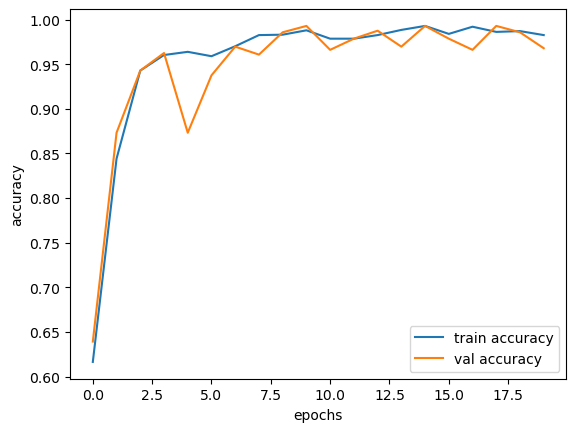

In [25]:
epochs = list(range(20))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

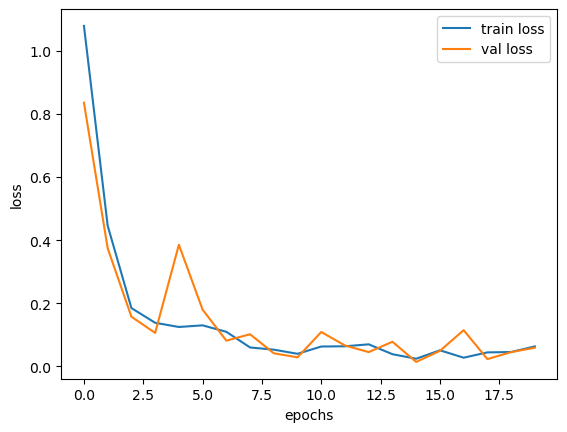

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# predictions 

In [27]:
from keras.models import load_model
model.save('speech_emotion_recg_model_updated.h5')
print("model saved")

model saved


In [28]:
# load the model
model = load_model('speech_emotion_recg_model_updated.h5')

In [29]:
def preprocess_audio(audio_file):
    y, sr = librosa.load(audio_file, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    mfcc = np.expand_dims(mfcc, axis=0)  # Add batch dimension
    mfcc = np.expand_dims(mfcc, axis=-1)  # Add channel dimension
    return mfcc

In [30]:
# predict the category of new audio file
# audio_file = 'dataset/archive/TESS_Toronto_emotional_speech_set_data/OAF_sad/OAF_boat_sad.wav'  # Replace with the path to your new audio file
audio_file = 'dataset/try_voice/fear.wav'
preprocessed_audio = preprocess_audio(audio_file)
predictions = model.predict(preprocessed_audio)


1/1 [==============================] - 1s 722ms/step


In [33]:
# labels
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'shame', 'sadness']
predicted_emotion = emotion_labels[np.argmax(predictions)]

In [34]:
print(predicted_emotion)

disgust


In [35]:
len(predictions)

1

In [36]:
print(predictions)

[[6.4824726e-06 9.9946481e-01 1.4459551e-06 4.7009016e-05 1.5359787e-05
  2.4415474e-04 2.2067137e-04]]


In [37]:
data = [[6.2270330e-05, 2.2113582e-06, 9.9983621e-01, 1.8852392e-05, 4.7049627e-05, 2.2677759e-05, 1.0770820e-05]]

# Flatten the nested list and convert the values to strings
flat_data = [' '.join(map(str, inner)) for inner in predictions]

# Join the strings together with a space separator
result = ' '.join(flat_data)
ans=result.split()


percentage_pred=[]
for i in ans:
    percentage_pred.append(round(float(i),5))
    


values = np.array(percentage_pred)
total=np.sum(values)

per=(values/total)*100

In [38]:
print(per)

[1.0000e-03 9.9946e+01 0.0000e+00 5.0000e-03 2.0000e-03 2.4000e-02
 2.2000e-02]


In [39]:
normalized_predictions = (percentage_pred / np.sum(percentage_pred)) * 100

# Emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

# Create a dictionary to map labels to percentages
emotion_percentages = {label: percentage for label, percentage in zip(emotion_labels, normalized_predictions)}

print(emotion_percentages)

{'angry': 0.001, 'disgust': 99.946, 'fear': 0.0, 'happy': 0.005, 'neutral': 0.002, 'ps': 0.024, 'sad': 0.022000000000000002}
